<table style="width:100%; border: none;">
    <tr>
        <td colspan="3" style="text-align:center; border: none;">
            <img src="assets/banner.svg" alt="Banner Image" style="width:100%;">
        </td>
    </tr>
    <!-- Add other rows and cells below if needed -->
</table>


In [19]:
from utils import *
import ipywidgets as widgets

def display_coordinates(city):
    
    global selected_coordinates
    global selected_city    

    coords = capitals_coordinates[city]
    selected_coordinates = coords
    selected_city = city
    # print(f"Coordinates of {city}: Latitude = {coords[0]}, Longitude = {coords[1]}")
    return selected_coordinates, city

# Variable to store the selected coordinates
selected_coordinates = None
# Create and display the dropdown
widgets.interact(display_coordinates, city=sorted(list(capitals_coordinates.keys())))

interactive(children=(Dropdown(description='city', options=('Amsterdam', 'Athens', 'Berlin', 'Bratislava', 'Br…

<function __main__.display_coordinates(city)>

In [20]:
URL_DATASET = "https://cacheb.dcms.e2e.desp.space/destine-climate-dt/SSP3-7.0-IFS-NEMO-0001-standard-sfc-v0.zarr"
# Get destine climate dt data
dataset = get_cacheB_dataset(url_dataset=URL_DATASET) # data access 
df = preprocess(dataset, lat=selected_coordinates[0], lon=selected_coordinates[1], method="nearest", resample_period="7D")

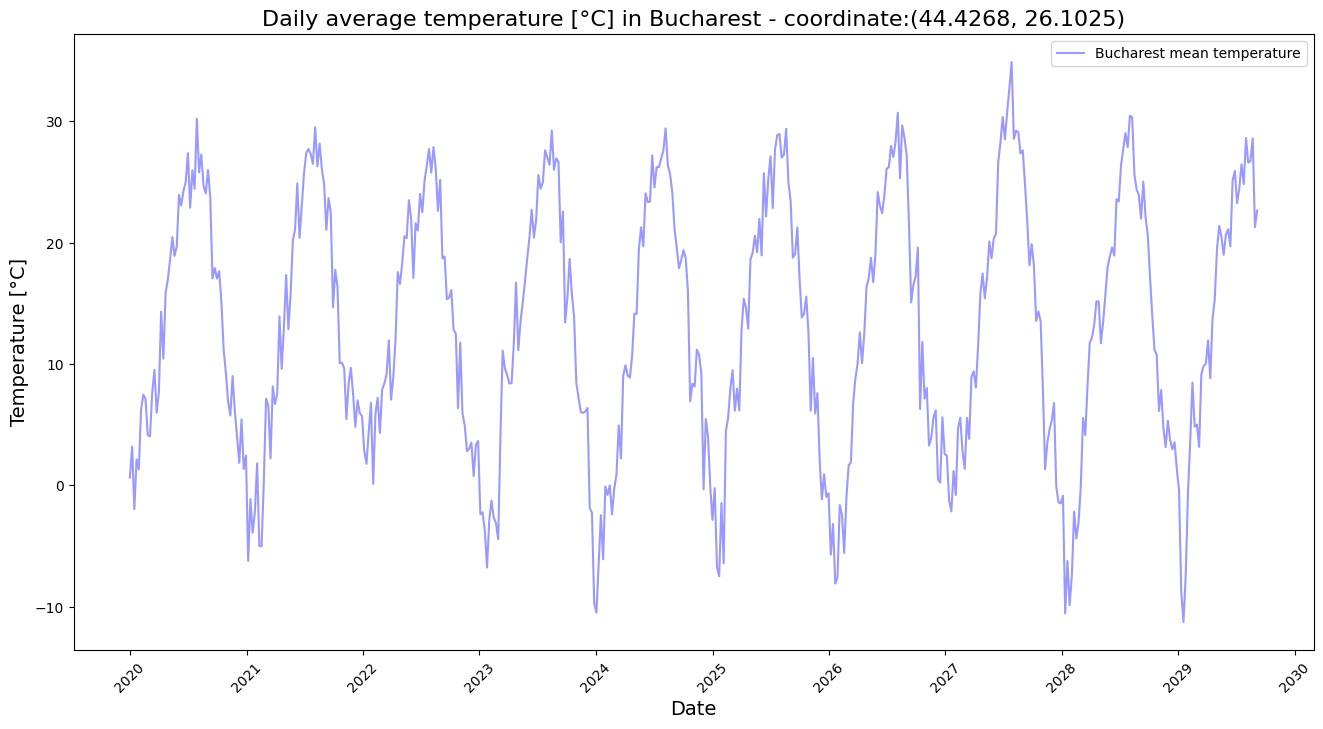

In [21]:
basic_plot(df, city=selected_city, coord=selected_coordinates, verbose=True)

In [22]:
model, train_df, test_df = train_model(df, date_col='time', temp_col='temperature')
df_forecast, mae, rmse = make_predictions(model, test_df)
plot_forecast(train_df=train_df, 
              test_df=test_df, 
              forecast=df_forecast,
              city=selected_city, 
              coord=selected_coordinates)

10:30:28 - cmdstanpy - INFO - Chain [1] start processing


10:30:28 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 2.666370916133409
Root Mean Squared Error: 3.403409925298668
